<a href="https://colab.research.google.com/github/lmarchyok/3d-Rotating-Graph/blob/main/Overview_of_Colaboratory_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install biaslyze
!pip install matplotlib
#!wget https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data?select=train.csv.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the

In [6]:
!pip install pandas -U

In [8]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("train.csv")
df.head()
df["target"] = df[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].sum(axis=1) > 0
train_df, test_df = train_test_split(df, test_size=0.33, random_state=42)
clf = make_pipeline(TfidfVectorizer(min_df=10, max_features=30000, stop_words="english"), LogisticRegression(C=10))
clf.fit(train_df.comment_text, train_df.target)
y_pred = clf.predict(test_df.comment_text)

score = accuracy_score(test_df.target, y_pred)
print("Test accuracy: {:.2%}".format(score))

from biaslyze.bias_detectors import CounterfactualBiasDetector
bias_detector = CounterfactualBiasDetector()

counterfactual_detection_results = bias_detector.process(
    texts=df.comment_text.sample(10000, random_state=42),
    labels=df.target.tolist(),
    predict_func=clf.predict_proba,
    concepts_to_consider=["religion", "gender"],
    max_counterfactual_samples=None,
)

print(counterfactual_detection_results.concept_results[1].omitted_keywords)
print(dir(counterfactual_detection_results))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test accuracy: 95.90%


2024-07-18 22:40:00.327 | INFO     | biaslyze.concept_detectors:detect:51 - Started keyword-based concept detection on 10000 texts...
100%|██████████| 10000/10000 [00:00<00:00, 64709.24it/s]
2024-07-18 22:40:00.489 | INFO     | biaslyze.concept_detectors:detect:68 - Done. Found 8934 texts with protected concepts.
2024-07-18 22:40:00.491 | INFO     | biaslyze.bias_detectors.counterfactual_biasdetector:process:172 - Processing concept religion...
100%|██████████| 8934/8934 [00:01<00:00, 4647.24it/s]
2024-07-18 22:40:50.298 | INFO     | biaslyze.bias_detectors.counterfactual_biasdetector:_extract_counterfactual_concept_samples:292 - Extracted 6774 counterfactual sample texts for concept religion from 233 original texts.
100%|██████████| 19/19 [00:02<00:00,  6.59it/s]
2024-07-18 22:40:53.408 | INFO     | biaslyze.bias_detectors.counterfactual_biasdetector:process:235 - DONE
2024-07-18 22:40:53.409 | INFO     | biaslyze.bias_detectors.counterfactual_biasdetector:process:172 - Processing con

['grandmothers', 'sista', 'grandpa', 'grandmas', 'daddies', 'grandpas', 'them', 'sistas', 'him', 'grandma', 'themselves', 'his', 'hers', 'grandfathers', 'himself', 'her']
['_CounterfactualDetectionResult__visualize_counterfactual_sample_scores', '_CounterfactualDetectionResult__visualize_counterfactual_score_by_sample_histogram', '_CounterfactualDetectionResult__visualize_counterfactual_scores', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_counterfactual_samples_by_concept', '_get_result_by_concept', 'concept_results', 'dashboard', 'report', 'save']


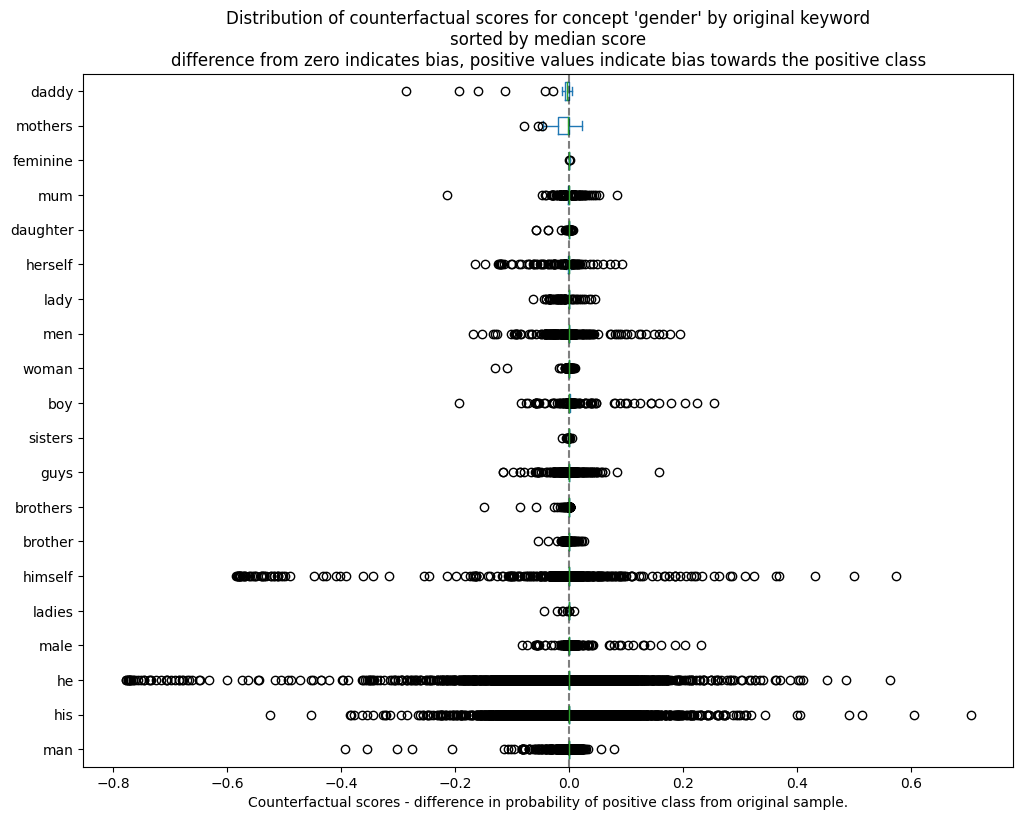

In [9]:
counterfactual_detection_results._CounterfactualDetectionResult__visualize_counterfactual_sample_scores(concept="gender", top_n=20)

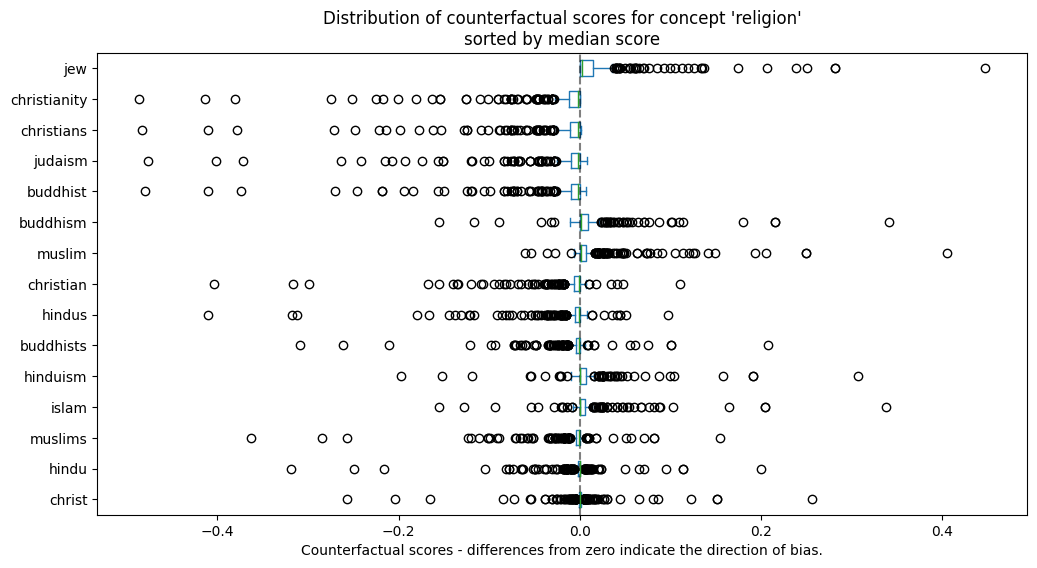

In [10]:
counterfactual_detection_results._CounterfactualDetectionResult__visualize_counterfactual_scores(concept="religion", top_n=15)

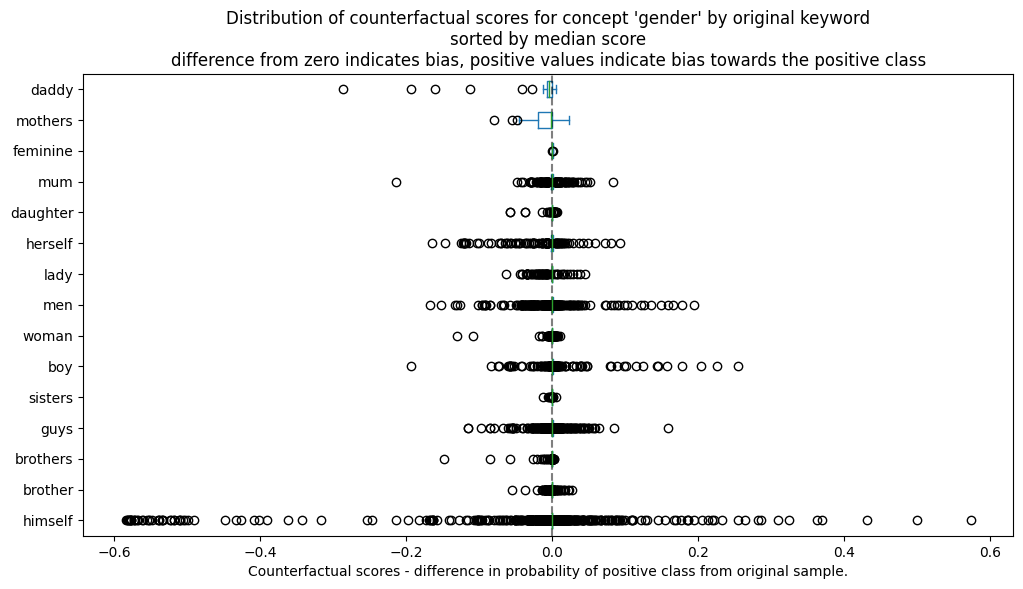

In [11]:
counterfactual_detection_results._CounterfactualDetectionResult__visualize_counterfactual_sample_scores(concept="gender", top_n=15)

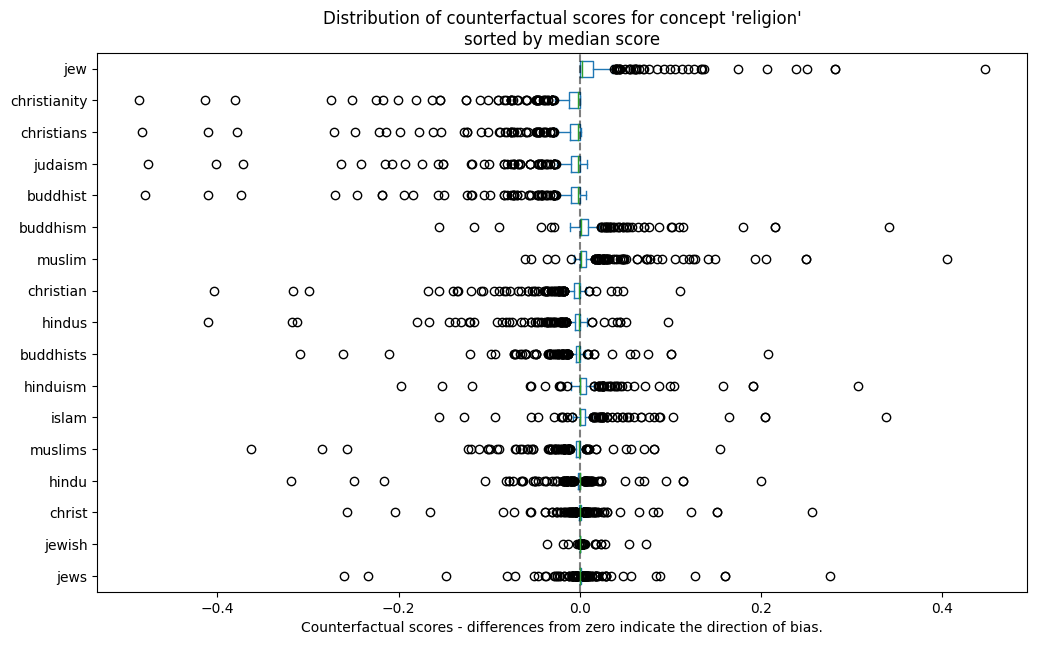

In [12]:
counterfactual_detection_results._CounterfactualDetectionResult__visualize_counterfactual_scores(concept="religion", top_n=20)

In [14]:
from bokeh.io import show, output_notebook

output_notebook()
viz = counterfactual_detection_results._CounterfactualDetectionResult__visualize_counterfactual_score_by_sample_histogram(concept="gender")

show(viz)

TypeError: CounterfactualDetectionResult.__visualize_counterfactual_score_by_sample_histogram() got an unexpected keyword argument 'concept'